Original 3D array shape: (4, 4, 4)
Total elements: 64
Value range: 0 to 63
CYCLIC TRANSITIONS - X → Z → Y → X:
Step 1: Original array (X contiguous)

Step 2: X→Z transition (Z contiguous)
Transpose: (Z,Y,X) → (Y,X,Z)

Step 3: Z→Y transition (Y contiguous)
Transpose: (Y,X,Z) → (Z,X,Y)

Step 4: Y→X transition (back to X contiguous)
Transpose: (Z,X,Y) → (Z,Y,X)

Verification: Arrays are identical: True


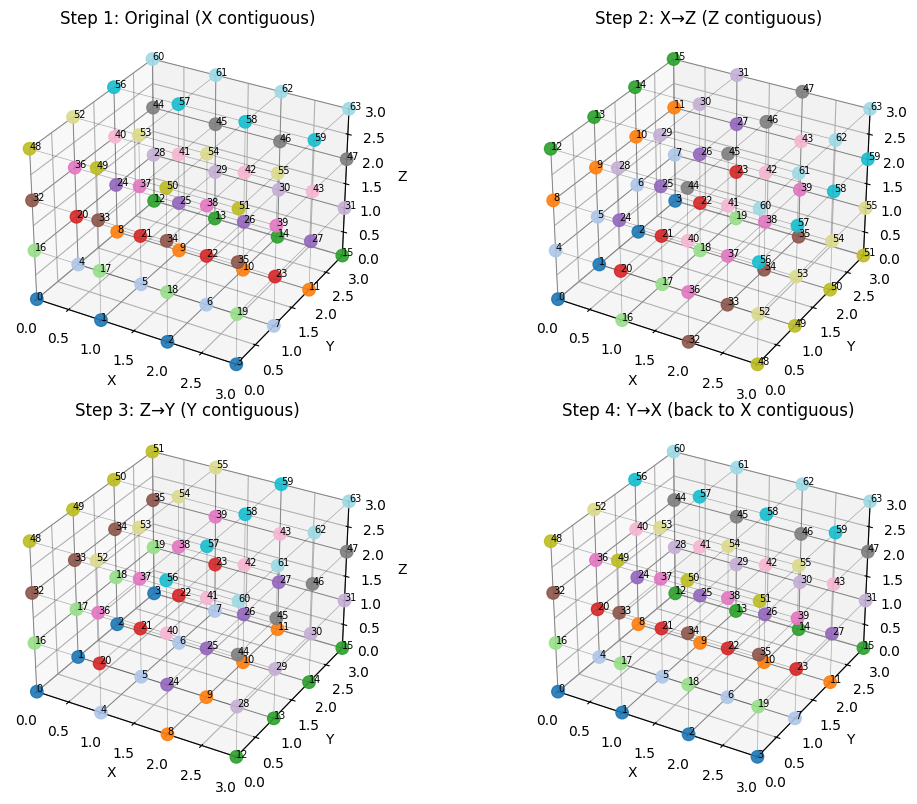

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting only enabled for elems_per_side <= 4
elems_per_side = 4
comp_elems_per_side =  elems_per_side # // 2 + 1
num_ranks = 1
elems_per_plane = elems_per_side * comp_elems_per_side
elems_per_domain = elems_per_plane * elems_per_side
planes_per_rank = elems_per_side // num_ranks

# Create 3d array with numbers
numbers_3d = np.arange(elems_per_domain).reshape(elems_per_side, elems_per_side, comp_elems_per_side)
print("Original 3D array shape:", numbers_3d.shape)
print("Total elements:", numbers_3d.size)
print("Value range:", numbers_3d.min(), "to", numbers_3d.max())

def plot_3d_array_subplot(arr, ax, title="3D Array Visualization"):
    """Plot a 3d array in 3D space with grid lines on given axis"""
    # Create coordinate grids
    y, z, x = np.meshgrid(range(arr.shape[0]), range(arr.shape[1]), range(arr.shape[2]), indexing='xy')
    
    # Flatten everything for plotting
    x_flat = x.flatten()
    y_flat = y.flatten()
    z_flat = z.flatten()
    numbers_flat = arr.flatten()
    
    # Use 16 colors cycling
    colors = numbers_flat // elems_per_side
    
    # Plot the scattered points
    scatter = ax.scatter(x_flat, y_flat, z_flat, c=colors, cmap='tab20', s=80, alpha=0.9)
    
    # Add grid lines
    # Lines along X direction (keeping Y,Z constant)
    for j in range(arr.shape[1]):  # Y direction
        for k in range(arr.shape[2]):  # Z direction
            x_line = range(arr.shape[0])
            y_line = [j] * arr.shape[0]
            z_line = [k] * arr.shape[0]
            ax.plot(x_line, y_line, z_line, 'k-', alpha=0.3, linewidth=0.5)
    
    # Lines along Y direction (keeping X,Z constant)
    for i in range(arr.shape[0]):  # X direction
        for k in range(arr.shape[2]):  # Z direction
            x_line = [i] * arr.shape[1]
            y_line = range(arr.shape[1])
            z_line = [k] * arr.shape[1]
            ax.plot(x_line, y_line, z_line, 'k-', alpha=0.3, linewidth=0.5)
    
    # Lines along Z direction (keeping X,Y constant)
    for i in range(arr.shape[0]):  # X direction
        for j in range(arr.shape[1]):  # Y direction
            x_line = [i] * arr.shape[2]
            y_line = [j] * arr.shape[2]
            z_line = range(arr.shape[2])
            ax.plot(x_line, y_line, z_line, 'k-', alpha=0.3, linewidth=0.5)
    
    # Add number labels
    for xi, yi, zi, num in zip(x_flat, y_flat, z_flat, numbers_flat):
        ax.text(xi, yi, zi, str(num), fontsize=7)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    
    # Set axis limits to show full range
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.set_zlim(0, 3)
    
    return scatter


print("CYCLIC TRANSITIONS - X → Z → Y → X:")
print("="*50)

if elems_per_side <= 4:
    # Create figure with 2x2 subplot layout
    fig = plt.figure(figsize=(12, 8))

# Step 1: Original (X contiguous)
print("Step 1: Original array (X contiguous)")

if elems_per_side <= 4:
    ax1 = fig.add_subplot(221, projection='3d')
    scatter1 = plot_3d_array_subplot(numbers_3d, ax1, "Step 1: Original (X contiguous)")

# Step 2: X → Z (make Z contiguous)
# This means: (Z,Y,X) → (Y,X,Z)
step2 = np.transpose(numbers_3d, (1, 2, 0)) 
print("\nStep 2: X→Z transition (Z contiguous)")
print(f"Transpose: (Z,Y,X) → (Y,X,Z)")
    
if elems_per_side <= 4:
    ax2 = fig.add_subplot(222, projection='3d')
    scatter2 = plot_3d_array_subplot(step2, ax2, "Step 2: X→Z (Z contiguous)")

# Step 3: Z → Y (make Y contiguous) 
# This means: (Y,X,Z) → (Z,X,Y)
step3 = np.transpose(step2, (2, 1, 0))
print("\nStep 3: Z→Y transition (Y contiguous)")
print(f"Transpose: (Y,X,Z) → (Z,X,Y)")
    
if elems_per_side <= 4:
    ax3 = fig.add_subplot(223, projection='3d')
    scatter3 = plot_3d_array_subplot(step3, ax3, "Step 3: Z→Y (Y contiguous)")

# Step 4: Y → X (back to X contiguous, should match original)
# This means: (Z,X,Y) → (Z,Y,X)
step4 = np.transpose(step3, (0, 2, 1))
print("\nStep 4: Y→X transition (back to X contiguous)")
print(f"Transpose: (Z,X,Y) → (Z,Y,X)")
    
if elems_per_side <= 4:
    ax4 = fig.add_subplot(224, projection='3d')
    scatter4 = plot_3d_array_subplot(step4, ax4, "Step 4: Y→X (back to X contiguous)")

# Verify we're back to the original
print(f"\nVerification: Arrays are identical: {np.array_equal(numbers_3d, step4)}")

if elems_per_side <= 4:
    plt.tight_layout()
    plt.show()

In [29]:
# Verify split and concatenation results in same array
split_arrays = []
for i in range(num_ranks):
    slice_array = numbers_3d[i*planes_per_rank:i*planes_per_rank+planes_per_rank, :, :]
    split_arrays.append(slice_array)

# Unite them back using concatenate
united_arrays = np.concatenate(split_arrays, axis=0)

print(f"\nVerification: Arrays are identical: {np.array_equal(numbers_3d, united_arrays)}")


Verification: Arrays are identical: True


In [30]:
# Simulate real transposition across ranks

# Prepare send buffer
shape = split_arrays[0].shape
print(f"Initial shape of split array: {shape}")
print(f"Initial rank[0] array: \n{split_arrays[0]}")

send_buffer = np.zeros(elems_per_domain).reshape(num_ranks, elems_per_side, comp_elems_per_side, planes_per_rank)
    
shape = send_buffer[0].shape
print(f"\nShape of rank[0] send buffer: {shape}")

# Fill send buffer with z-contiguous pre communication data
# In z-direction only [planes_per_rank] elements can be contiguous because the other values are on a different rank.
# This organization enables sending in batches
for rank in range(num_ranks):
    for idx_p in range(planes_per_rank):
        for idx_comp in range(comp_elems_per_side):
            for idx_num in range(elems_per_side):
                send_buffer[rank][idx_num, idx_comp, idx_p] = split_arrays[rank][idx_p, idx_num, idx_comp]
                
print(f"Rank[0] send buffer: \n{send_buffer[0]}")

Initial shape of split array: (4, 4, 4)
Initial rank[0] array: 
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]

 [[48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]
  [60 61 62 63]]]

Shape of rank[0] send buffer: (4, 4, 4)
Rank[0] send buffer: 
[[[ 0. 16. 32. 48.]
  [ 1. 17. 33. 49.]
  [ 2. 18. 34. 50.]
  [ 3. 19. 35. 51.]]

 [[ 4. 20. 36. 52.]
  [ 5. 21. 37. 53.]
  [ 6. 22. 38. 54.]
  [ 7. 23. 39. 55.]]

 [[ 8. 24. 40. 56.]
  [ 9. 25. 41. 57.]
  [10. 26. 42. 58.]
  [11. 27. 43. 59.]]

 [[12. 28. 44. 60.]
  [13. 29. 45. 61.]
  [14. 30. 46. 62.]
  [15. 31. 47. 63.]]]


In [31]:
# Simulate all to all communication
recv_buffer = np.zeros_like(send_buffer)

for src_rank in range(num_ranks):
    for dst_rank in range(num_ranks):
        src_slice = slice(dst_rank * planes_per_rank, (dst_rank + 1) * planes_per_rank)
        dst_slice = slice(src_rank * planes_per_rank, (src_rank + 1) * planes_per_rank)
        recv_buffer[dst_rank][dst_slice] = send_buffer[src_rank][src_slice]
        
print(f"Rank[0] receive buffer: \n{recv_buffer[0]}")

Rank[0] receive buffer: 
[[[ 0. 16. 32. 48.]
  [ 1. 17. 33. 49.]
  [ 2. 18. 34. 50.]
  [ 3. 19. 35. 51.]]

 [[ 4. 20. 36. 52.]
  [ 5. 21. 37. 53.]
  [ 6. 22. 38. 54.]
  [ 7. 23. 39. 55.]]

 [[ 8. 24. 40. 56.]
  [ 9. 25. 41. 57.]
  [10. 26. 42. 58.]
  [11. 27. 43. 59.]]

 [[12. 28. 44. 60.]
  [13. 29. 45. 61.]
  [14. 30. 46. 62.]
  [15. 31. 47. 63.]]]


In [32]:
# Reorganize receive buffer for (1, 2, 0)

shape = recv_buffer[0].shape
print(f"Initial shape of recveive buffer: {shape}")

final_buffer_1_2_0 = np.zeros(elems_per_domain).reshape(num_ranks, planes_per_rank, comp_elems_per_side, elems_per_side)
    
shape = final_buffer_1_2_0[0].shape
print(f"\nShape of rank[0] final buffer: {shape}")

# Reorganize data into a contiguous layout for (1, 2, 0)
for rank in range(num_ranks):
    for idx_p in range(planes_per_rank):
        for idx_comp in range(comp_elems_per_side):
            for idx_num in range(elems_per_side):
                dst_idx_x = idx_p + (idx_num // planes_per_rank) * planes_per_rank
                dst_idx_z = idx_num % planes_per_rank
                final_buffer_1_2_0[rank][dst_idx_z, idx_comp, dst_idx_x] = recv_buffer[rank][idx_num, idx_comp, idx_p]
                
print("\nTransposition for (1, 2, 0) complete")
print(f"Rank[0] final buffer (1, 2, 0): \n{final_buffer_1_2_0[0]}")

Initial shape of recveive buffer: (4, 4, 4)

Shape of rank[0] final buffer: (4, 4, 4)

Transposition for (1, 2, 0) complete
Rank[0] final buffer (1, 2, 0): 
[[[ 0. 16. 32. 48.]
  [ 1. 17. 33. 49.]
  [ 2. 18. 34. 50.]
  [ 3. 19. 35. 51.]]

 [[ 4. 20. 36. 52.]
  [ 5. 21. 37. 53.]
  [ 6. 22. 38. 54.]
  [ 7. 23. 39. 55.]]

 [[ 8. 24. 40. 56.]
  [ 9. 25. 41. 57.]
  [10. 26. 42. 58.]
  [11. 27. 43. 59.]]

 [[12. 28. 44. 60.]
  [13. 29. 45. 61.]
  [14. 30. 46. 62.]
  [15. 31. 47. 63.]]]


In [33]:
# Transpose (2, 1, 0)

# Prepare send buffer
shape = recv_buffer[0].shape
# print(f"Initial shape: {shape}")
# print(f"Initial rank[0] array: \n{final_buffer_1_2_0[0]}")

send_buffer = np.zeros(elems_per_domain).reshape(num_ranks, elems_per_side, comp_elems_per_side, planes_per_rank)
final_buffer_2_1_0 = np.zeros_like(final_buffer_1_2_0)
    
shape = final_buffer_2_1_0[0].shape
print(f"\nShape of final buffer (2,1,0): {shape}")

# Prepare send buffer
for rank in range(num_ranks):
    for idx_p in range(planes_per_rank):
        for idx_comp in range(comp_elems_per_side):
            for idx_num in range(elems_per_side):
                send_buffer[rank][idx_num, idx_comp, idx_p] = final_buffer_1_2_0[rank][idx_p, idx_comp, idx_num]
                
# print(f"\nRank[0] send buffer: \n{send_buffer[0]}")

# Simulate all to all communication
for src_rank in range(num_ranks):
    for dst_rank in range(num_ranks):
        src_slice = slice(dst_rank * planes_per_rank, (dst_rank + 1) * planes_per_rank)
        dst_slice = slice(src_rank * planes_per_rank, (src_rank + 1) * planes_per_rank)
        recv_buffer[dst_rank][dst_slice] = send_buffer[src_rank][src_slice]
        
# print(f"\nRank[0] receive buffer: \n{recv_buffer[0]}")

# Reorganize into contiguous layout
for rank in range(num_ranks):
    for idx_p in range(planes_per_rank):
        for idx_comp in range(comp_elems_per_side):
            for idx_num in range(elems_per_side):
                dst_idx_x = idx_p + (idx_num // planes_per_rank) * planes_per_rank
                dst_idx_z = idx_num % planes_per_rank
                final_buffer_2_1_0[rank][dst_idx_z, idx_comp, dst_idx_x] = recv_buffer[rank][idx_num, idx_comp, idx_p]
                
print("\nTransposition for (2, 1, 0) complete")
print(f"Rank[0] final buffer (2, 1, 0): \n{final_buffer_2_1_0[0]}")


Shape of final buffer (2,1,0): (4, 4, 4)

Transposition for (2, 1, 0) complete
Rank[0] final buffer (2, 1, 0): 
[[[ 0.  4.  8. 12.]
  [ 1.  5.  9. 13.]
  [ 2.  6. 10. 14.]
  [ 3.  7. 11. 15.]]

 [[16. 20. 24. 28.]
  [17. 21. 25. 29.]
  [18. 22. 26. 30.]
  [19. 23. 27. 31.]]

 [[32. 36. 40. 44.]
  [33. 37. 41. 45.]
  [34. 38. 42. 46.]
  [35. 39. 43. 47.]]

 [[48. 52. 56. 60.]
  [49. 53. 57. 61.]
  [50. 54. 58. 62.]
  [51. 55. 59. 63.]]]


In [34]:
# (0, 2, 1) does not require cross memory communication

final_buffer_0_2_1 = np.zeros_like(split_arrays)
shape = final_buffer_0_2_1[0].shape
print(f"\nShape of final buffer (0,2,1): {shape}")

for rank in range(num_ranks):
    for idx_p in range(planes_per_rank):
        for idx_comp in range(comp_elems_per_side):
            for idx_num in range(elems_per_side):
                final_buffer_0_2_1[rank][idx_p, idx_num, idx_comp] = final_buffer_2_1_0[rank][idx_p, idx_comp, idx_num]
                
print("\nTransposition for (0, 2, 1) complete")
print(f"Rank[0] final buffer (0, 2, 1): \n{final_buffer_0_2_1[0]}")


Shape of final buffer (0,2,1): (4, 4, 4)

Transposition for (0, 2, 1) complete
Rank[0] final buffer (0, 2, 1): 
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]

 [[48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]
  [60 61 62 63]]]


In [35]:
# Now as functions

def prepare_send_buffer_1_2_0(input_buffer):
    send_buffer = np.zeros(elems_per_domain).reshape(num_ranks, elems_per_side, comp_elems_per_side, planes_per_rank)
        
    for rank in range(num_ranks):
        for idx_p in range(planes_per_rank):
            for idx_comp in range(comp_elems_per_side):
                for idx_num in range(elems_per_side):
                    send_buffer[rank][idx_num, idx_comp, idx_p] = input_buffer[rank][idx_p, idx_num, idx_comp]
                
    return send_buffer


def prepare_send_buffer_2_1_0(input_buffer):
    send_buffer = np.zeros(elems_per_domain).reshape(num_ranks, elems_per_side, comp_elems_per_side, planes_per_rank)

    for rank in range(num_ranks):
        for idx_p in range(planes_per_rank):
            for idx_comp in range(comp_elems_per_side):
                for idx_num in range(elems_per_side):
                    send_buffer[rank][idx_num, idx_comp, idx_p] = input_buffer[rank][idx_p, idx_comp, idx_num]
                
    return send_buffer


def communicate_all_to_all(send_buffer):
    recv_buffer = np.zeros(elems_per_domain).reshape(num_ranks, elems_per_side, comp_elems_per_side, planes_per_rank)

    for src_rank in range(num_ranks):
        for dst_rank in range(num_ranks):
            src_slice = slice(dst_rank * planes_per_rank, (dst_rank + 1) * planes_per_rank)
            dst_slice = slice(src_rank * planes_per_rank, (src_rank + 1) * planes_per_rank)
            recv_buffer[dst_rank][dst_slice] = send_buffer[src_rank][src_slice]
        
    return recv_buffer


def reorganize_recv(recv_buffer):
    final_buffer = np.zeros(elems_per_domain).reshape(num_ranks, planes_per_rank, comp_elems_per_side, elems_per_side)
        
    for rank in range(num_ranks):
        for idx_p in range(planes_per_rank):
            for idx_comp in range(comp_elems_per_side):
                for idx_num in range(elems_per_side):
                    dst_idx_x = idx_p + (idx_num // planes_per_rank) * planes_per_rank
                    dst_idx_z = idx_num % planes_per_rank
                    final_buffer[rank][dst_idx_z, idx_comp, dst_idx_x] = recv_buffer[rank][idx_num, idx_comp, idx_p]
                
    return final_buffer


def real_dist_transposition_1_2_0(input_buffer):
    send_buffer = prepare_send_buffer_1_2_0(input_buffer)
    recv_buffer = communicate_all_to_all(send_buffer)
    final_buffer = reorganize_recv(recv_buffer)
    
    return final_buffer


def real_dist_transposition_2_1_0(input_buffer):
    send_buffer = prepare_send_buffer_2_1_0(input_buffer)
    recv_buffer = communicate_all_to_all(send_buffer)
    final_buffer = reorganize_recv(recv_buffer)
    
    return final_buffer


def real_dist_transposition_0_2_1(input_buffer):
    final_buffer = np.zeros(elems_per_domain).reshape(num_ranks, planes_per_rank, elems_per_side, comp_elems_per_side)

    for rank in range(num_ranks):
        for idx_p in range(planes_per_rank):
            for idx_comp in range(comp_elems_per_side):
                for idx_num in range(elems_per_side):
                    final_buffer[rank][idx_p, idx_num, idx_comp] = input_buffer[rank][idx_p, idx_comp, idx_num]
    
    return final_buffer

In [36]:
# Verify real distributed transposition
# Non complex regular:
comp_elems_per_side =  elems_per_side
numbers_3d = np.arange(elems_per_domain).reshape(elems_per_side, elems_per_side, comp_elems_per_side)

print("Regular non complex data")

# Step 1: X → Z (make Z contiguous)
step1 = np.transpose(numbers_3d, (1, 2, 0)) 

# Step 2: Z → Y (make Y contiguous) 
step2 = np.transpose(step1, (2, 1, 0))

# Step 3: Y → X (back to X contiguous, should match original)
step3 = np.transpose(step2, (0, 2, 1))

# Verify we're back to the original
print(f"\nVerification: Arrays are same as initial after transposes: {np.array_equal(numbers_3d, step3)}")

# Non complex distributed
split_arrays = []
for i in range(num_ranks):
    slice_array = numbers_3d[i*planes_per_rank:i*planes_per_rank+planes_per_rank, :, :]
    split_arrays.append(slice_array)
    
print("Distributed non complex data")

# Step 1: X → Z (make Z contiguous)
split_step1 = real_dist_transposition_1_2_0(split_arrays)
step1_dist = np.concatenate(split_step1, axis=0)
print(f"Verification Step 1 distributed: Arrays are identical: {np.array_equal(step1, step1_dist)}")

# Step 2: Z → Y (make Y contiguous) 
split_step2 = real_dist_transposition_2_1_0(split_step1)
step2_dist = np.concatenate(split_step2, axis=0)
print(f"Verification Step 2 distributed: Arrays are identical: {np.array_equal(step2, step2_dist)}")

# Step 3: Y → X (back to X contiguous, should match original)
split_step3 = real_dist_transposition_0_2_1(split_step2)
step3_dist = np.concatenate(split_step3, axis=0)
print(f"Verification Step 3 distributed: Arrays are identical: {np.array_equal(step3, step3_dist)}")

print("\n" + 50 * "=" + "\n")

# Complex:
comp_elems_per_side =  elems_per_side // 2 + 1
elems_per_plane = elems_per_side * comp_elems_per_side
elems_per_domain = elems_per_plane * elems_per_side
numbers_3d = np.arange(elems_per_domain).reshape(elems_per_side, elems_per_side, comp_elems_per_side)

print("Complex data")

# Step 1: X → Z (make Z contiguous)
step1 = np.transpose(numbers_3d, (1, 2, 0)) 

# Step 2: Z → Y (make Y contiguous) 
step2 = np.transpose(step1, (2, 1, 0))

# Step 3: Y → X (back to X contiguous, should match original)
step3 = np.transpose(step2, (0, 2, 1))

# Verify we're back to the original
print(f"\nVerification: Arrays are same as initial after transposes: {np.array_equal(numbers_3d, step3)}")

# Non complex distributed
split_arrays = []
for i in range(num_ranks):
    slice_array = numbers_3d[i*planes_per_rank:i*planes_per_rank+planes_per_rank, :, :]
    split_arrays.append(slice_array)
    
print("Distributed complex data")

# Step 1: X → Z (make Z contiguous)
split_step1 = real_dist_transposition_1_2_0(split_arrays)
step1_dist = np.concatenate(split_step1, axis=0)
print(f"Verification Step 1 distributed: Arrays are identical: {np.array_equal(step1, step1_dist)}")

# Step 2: Z → Y (make Y contiguous) 
split_step2 = real_dist_transposition_2_1_0(split_step1)
step2_dist = np.concatenate(split_step2, axis=0)
print(f"Verification Step 2 distributed: Arrays are identical: {np.array_equal(step2, step2_dist)}")

# Step 3: Y → X (back to X contiguous, should match original)
split_step3 = real_dist_transposition_0_2_1(split_step2)
step3_dist = np.concatenate(split_step3, axis=0)
print(f"Verification Step 3 distributed: Arrays are identical: {np.array_equal(step3, step3_dist)}")

Regular non complex data

Verification: Arrays are same as initial after transposes: True
Distributed non complex data
Verification Step 1 distributed: Arrays are identical: True
Verification Step 2 distributed: Arrays are identical: True
Verification Step 3 distributed: Arrays are identical: True


Complex data

Verification: Arrays are same as initial after transposes: True
Distributed complex data
Verification Step 1 distributed: Arrays are identical: True
Verification Step 2 distributed: Arrays are identical: True
Verification Step 3 distributed: Arrays are identical: True
